# 偏离

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from plotnine import *

## Diverging Bar


In [2]:
mtcars = pd.read_csv("data/mtcars.csv")
mtcars.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars
0,4.582576,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1,Mazda RX4
1,4.582576,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1,Mazda RX4 Wag
2,4.774935,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1,Datsun 710
3,4.626013,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1,Hornet 4 Drive
4,4.324350,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1,Hornet Sportabout


In [3]:
x = mtcars["mpg"]
mtcars["mpg_z"] = (x - x.mean()) / x.std()
mtcars["types"] = np.where(mtcars["mpg_z"] < 0, "red", "green")
mtcars_sorted = mtcars.sort_values("mpg_z").reset_index()
mtcars_sorted.head()

,index,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,fast,cars,mpg_z,types
0,15,3.224903,8,460.0,215,3.00,5.424,17.82,0,0,3,4,0,Lincoln Continental,-1.829979,red
1,14,3.224903,8,472.0,205,2.93,5.250,17.98,0,0,3,4,0,Cadillac Fleetwood,-1.829979,red
2,23,3.646917,8,350.0,245,3.73,3.840,15.41,0,0,3,4,0,Camaro Z28,-1.191664,red
3,6,3.781534,8,360.0,245,3.21,3.570,15.84,0,0,3,4,0,Duster 360,-0.988049,red
4,16,3.834058,8,440.0,230,3.23,5.345,17.42,0,0,3,4,0,Chrysler Imperial,-0.908604,red


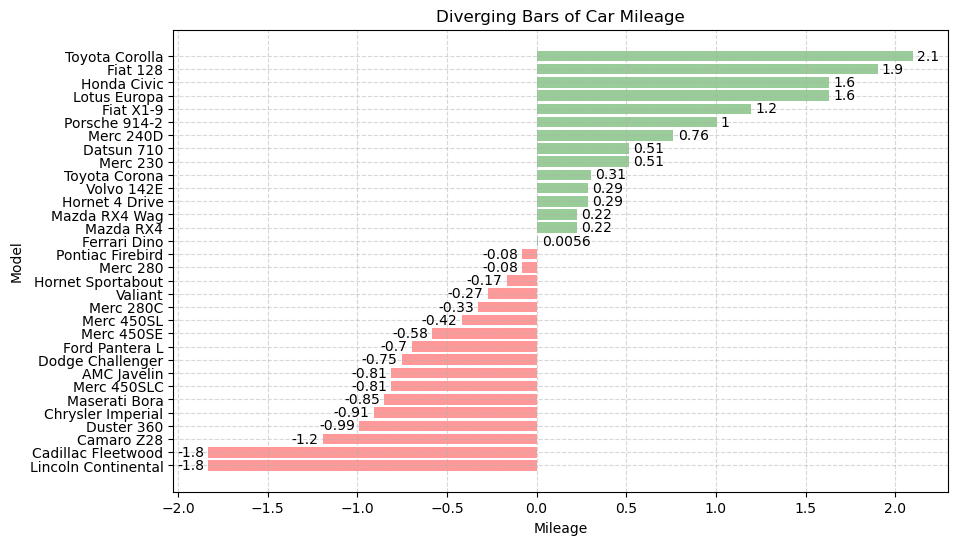

In [4]:
_, ax = plt.subplots(figsize=(10, 6))

bar = ax.barh(
    y=mtcars_sorted.index,
    width=mtcars_sorted.mpg_z,
    color=mtcars_sorted.types,
    alpha=0.4,
    lw=5,
)

ax.bar_label(container=bar, fmt="%0.2g", label_type="edge", padding=3)

ax.set(
    xlabel="Mileage",
    ylabel="Model",
    yticks=mtcars_sorted.index,
    yticklabels=mtcars_sorted.cars,
    title="Diverging Bars of Car Mileage",
)
ax.tick_params(axis="both", labelsize="medium")
ax.grid(linestyle="--", alpha=0.5)

plt.show()

### ggplot2 version


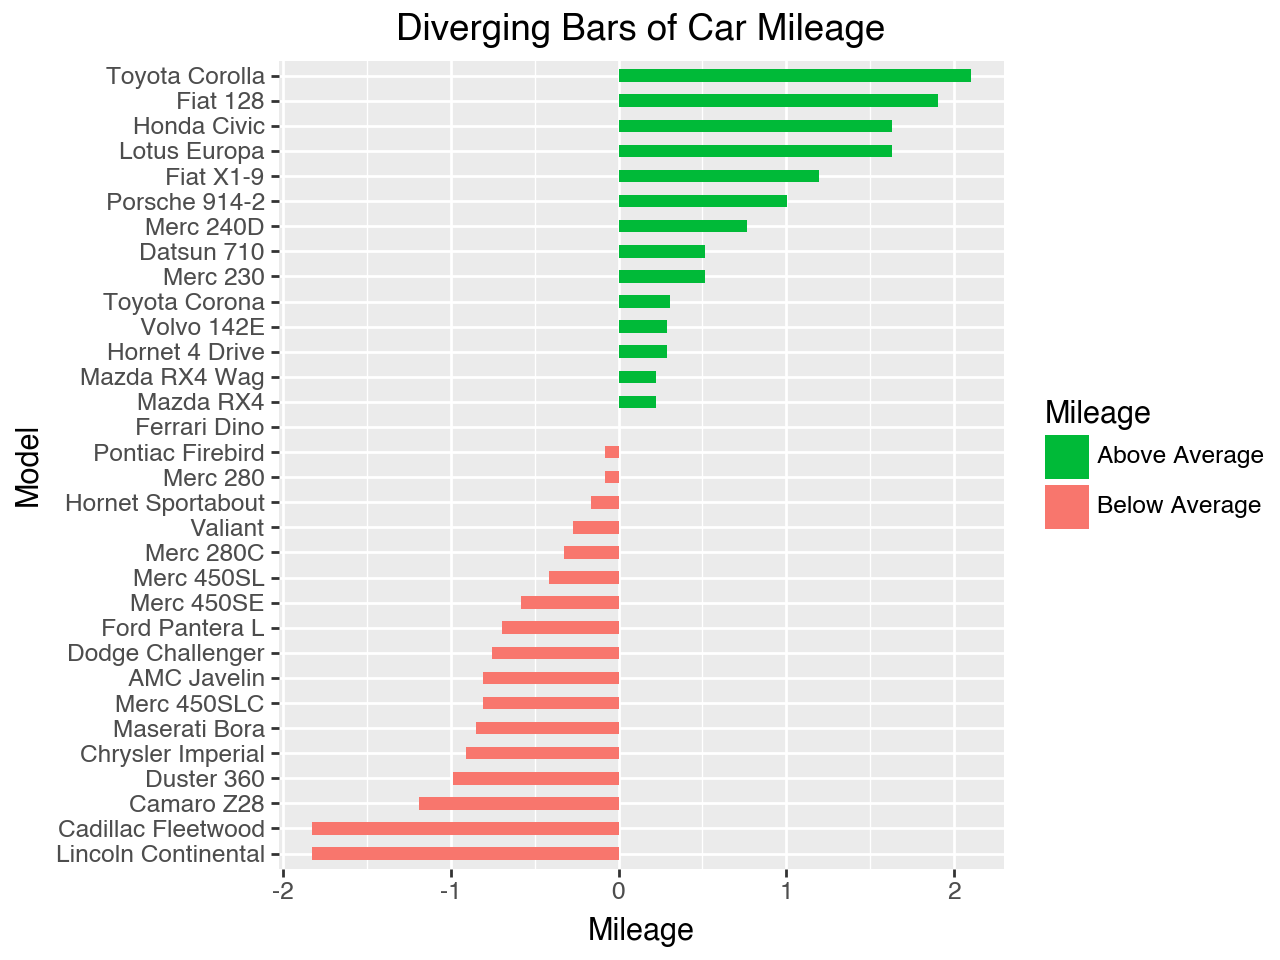

In [5]:
g = ggplot(mtcars_sorted, aes(x="cars", y="mpg_z", label="mpg_z"))

(
    g
    + geom_bar(aes(fill="types"), stat="identity", width=0.5)
    + scale_fill_manual(
        name="Mileage",
        labels=["Above Average", "Below Average"],
        values={"green": "#00ba38", "red": "#f8766d"},
    )
    + scale_x_discrete(limits=mtcars_sorted.cars)
    + labs(title="Diverging Bars of Car Mileage", x="Model", y="Mileage")
    + theme(plot_title=element_text(hjust=0.5))
    + coord_flip()
)

## Diverging Lollipop


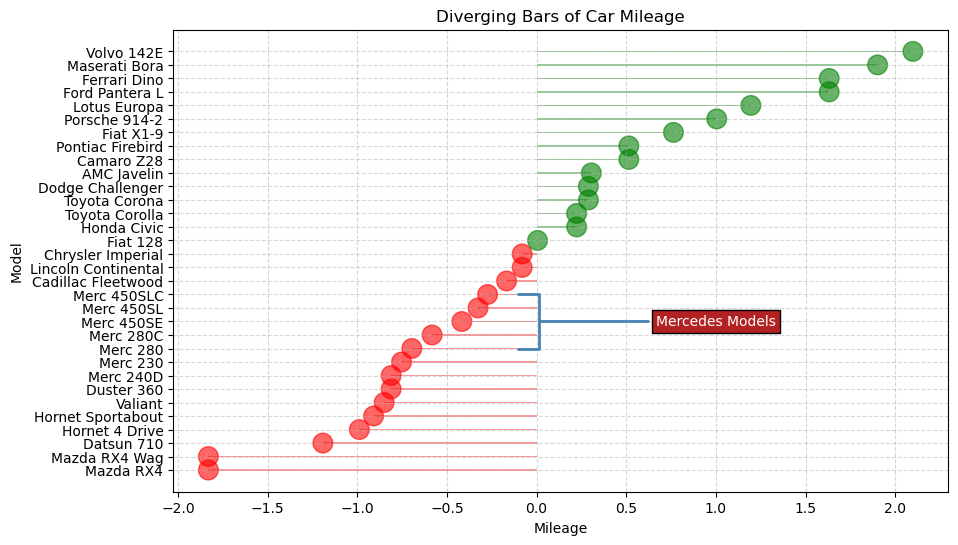

In [6]:
_, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
    mtcars_sorted.mpg_z,
    mtcars_sorted.index,
    color=mtcars_sorted.types,
    s=200,
    alpha=0.6,
)

ax.barh(
    y=mtcars_sorted.index,
    width=mtcars_sorted.mpg_z,
    color=mtcars_sorted.types,
    alpha=0.4,
    height=0.1,
)

ax.annotate(
    "Mercedes Models",
    xy=(0.0, 11.0),
    xytext=(1.0, 11),
    xycoords="data",
    fontsize="medium",
    ha="center",
    va="center",
    color="white",
    bbox={"boxstyle": "square", "fc": "firebrick"},
    arrowprops={
        "arrowstyle": "-[, widthB=2.0, lengthB=1.5",
        "lw": 2.0,
        "color": "steelblue",
    },
)

ax.set(
    xlabel="Mileage",
    ylabel="Model",
    yticks=mtcars.index,
    yticklabels=mtcars.cars,
    title="Diverging Bars of Car Mileage",
)
ax.tick_params(axis="both", labelsize="medium")

ax.grid(linestyle="--", alpha=0.5)

plt.show()

### ggplot2 version


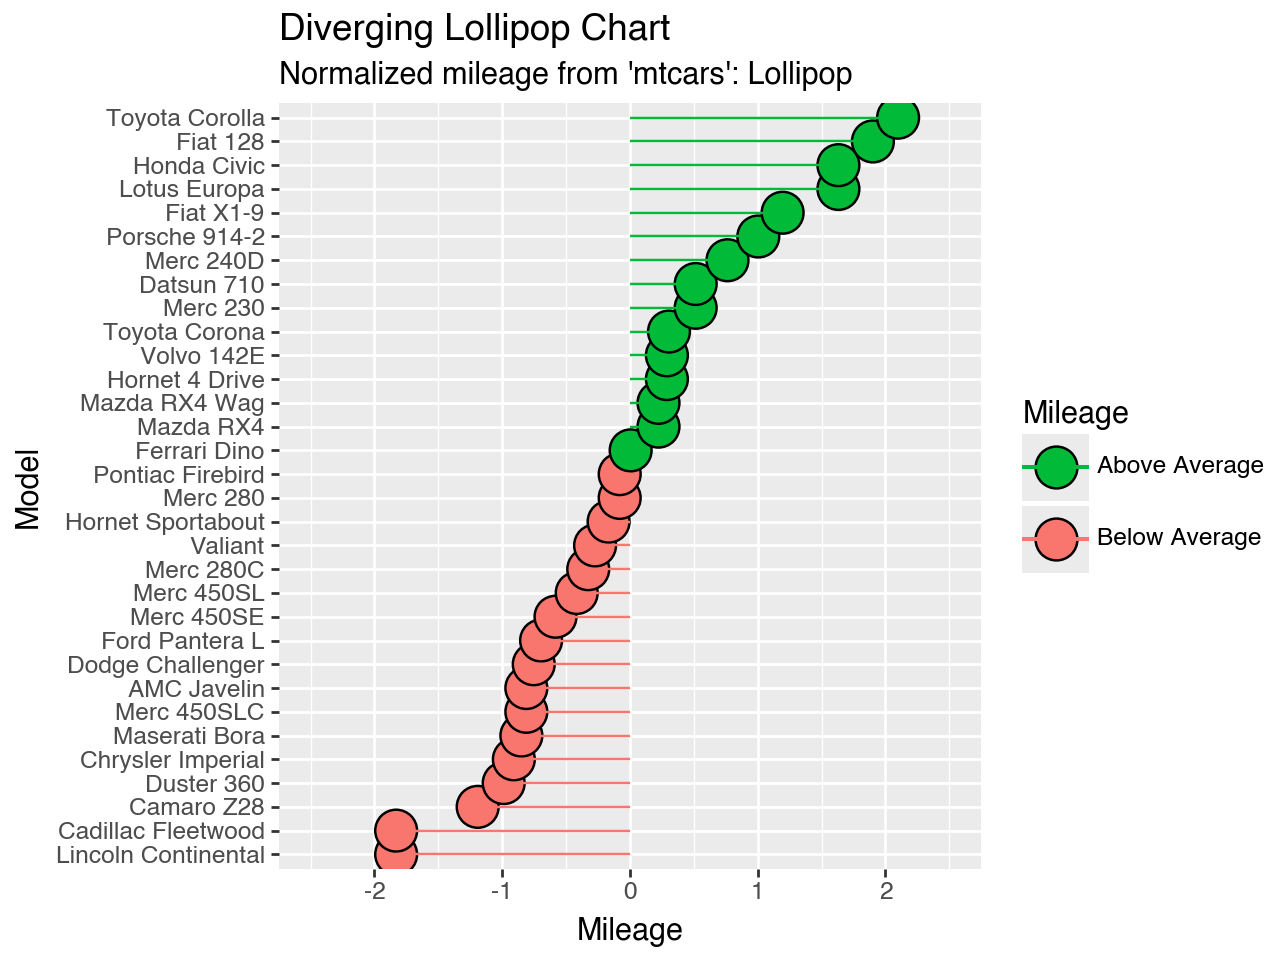

In [7]:
(
    g
    + geom_point(aes(fill="types"), stat="identity", size=8)
    + scale_fill_manual(
        name="Mileage",
        labels=["Above Average", "Below Average"],
        values={"green": "#00ba38", "red": "#f8766d"},
    )
    + geom_segment(aes(y=0, x="cars", yend="mpg_z", xend="cars", color="types"))
    + scale_color_manual(
        name="Mileage",
        labels=["Above Average", "Below Average"],
        values={"green": "#00ba38", "red": "#f8766d"},
    )
    + scale_x_discrete(limits=mtcars_sorted.cars)
    + labs(
        title="Diverging Lollipop Chart",
        subtitle="Normalized mileage from 'mtcars': Lollipop",
        x="Model",
        y="Mileage",
    )
    + ylim(-2.5, 2.5)
    + coord_flip()
)

## Diverging Dot


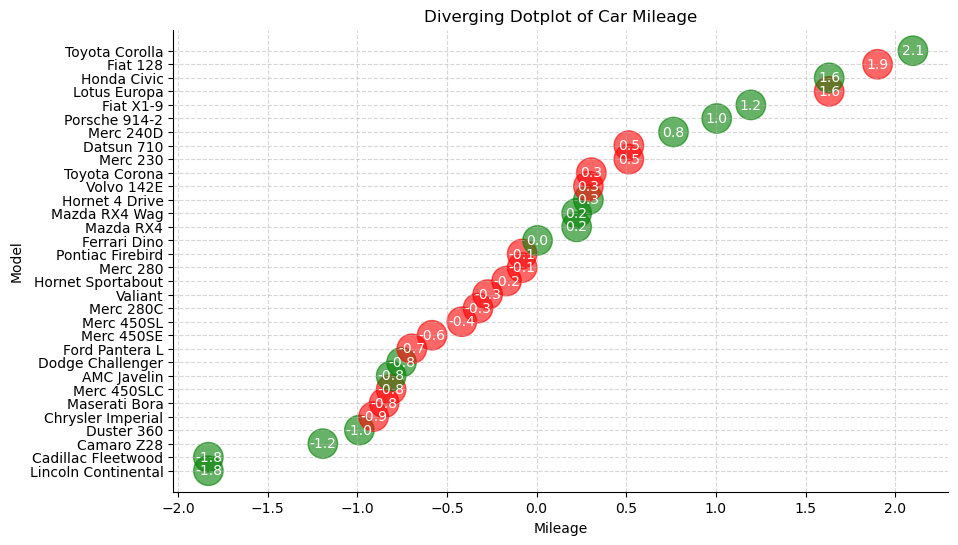

In [8]:
_, ax = plt.subplots(figsize=(10, 6))

scat = ax.scatter(
    mtcars_sorted.mpg_z, mtcars_sorted.index, s=450, alpha=0.6, color=mtcars.types
)

for x, y, text in zip(mtcars_sorted.mpg_z, mtcars_sorted.index, mtcars_sorted.mpg_z):
    ax.text(
        x,
        y,
        round(text, 1),
        horizontalalignment="center",
        verticalalignment="center",
        fontdict={"color": "white"},
    )

ax.spines[["top", "right"]].set_visible(False)

ax.set(
    xlabel="Mileage",
    ylabel="Model",
    yticks=mtcars_sorted.index,
    yticklabels=mtcars_sorted.cars,
    title="Diverging Dotplot of Car Mileage",
)
ax.tick_params(axis="both", labelsize="medium")
ax.grid(linestyle="--", alpha=0.5)

plt.show()

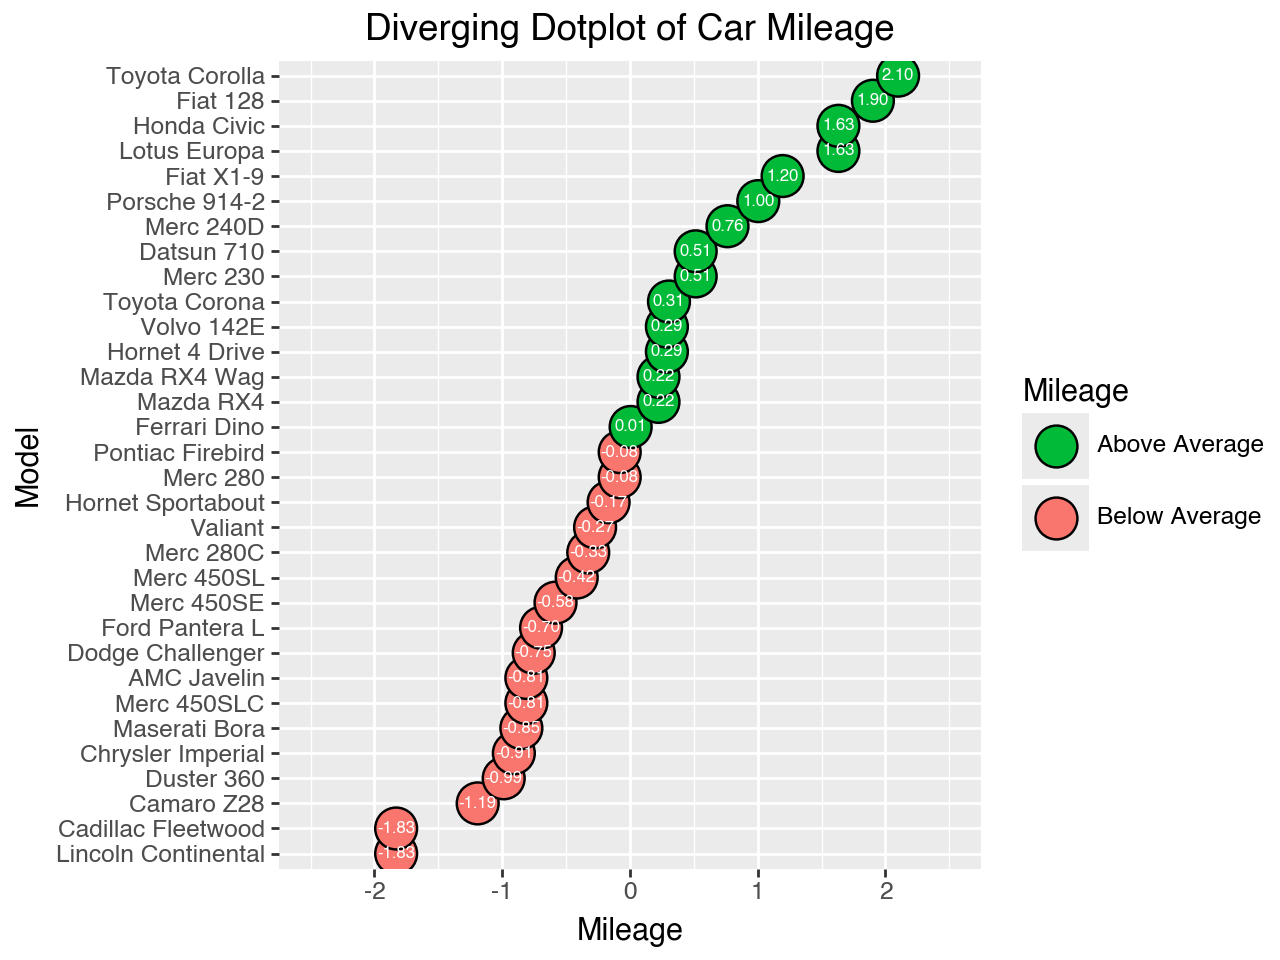

In [9]:
(
    g
    + geom_point(aes(fill="types"), stat="identity", size=8)
    + scale_fill_manual(
        name="Mileage",
        labels=["Above Average", "Below Average"],
        values={"green": "#00ba38", "red": "#f8766d"},
    )
    + geom_text(color="white", size=6, format_string="{:.2f}")
    + labs(title="Diverging Dotplot of Car Mileage", x="Model", y="Mileage")
    + theme(plot_title=element_text(hjust=0.5))
    + scale_x_discrete(limits=mtcars_sorted.cars)
    + ylim(-2.5, 2.5)
    + coord_flip()
)